#Cours de Machine Learning (Lettres), Semestre d'Automne 2024 - Rendu 1

##Professeur : Guillaume Guex
##Auteur : Joseph Grob

##Informations générales sur le code:

- Le code prend environ 17min. pour s'exécuter avec CPU comme type d'exécution (il a été chronométré dès son lancement). Nous sommes volontairement à la limite des 20 min. de la consigne pour permettre notamment aux meilleurs paramètres de nos modèles d'être trouvés et d'avoir le plus grand nombre d'itérations possibles pour se rapprocher des meilleurs résultats.


- Toutes les bibliothèques utilisées proviennent du cours. L'essentiel du code provient du cours et pour ce qui ne vient pas du cours, comme "pd.concat()" ou "from sklearn.exceptions import ConvergenceWarning", j'ai mis la source dans les commentaires du code.

- Les analyses des résultats et les commentaires proviennnent du contenu du cours. Il m'est arrivé parfois de compléter l'analyse en m'aidant du livre d'Aurélien Géron (2019). J'ai mis l'auteur entre parenthèses dans les analyses pour les quelques fois où j'ai cherché des informations pour compléter mes analyses. Aussi pour certains faits médicaux sur la santé mentale j'ai utilisé un article trouvé sur internet. Voici la bibliographie sur notebook:

 Source :

 - Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O'Reilly Media

 - Kuan, G., et al. (2023). The impact of COVID-19 on students’ anxiety and its clarification: a systematic review. Frontiers in Psychology. https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2023.1134703/full


#**Partie 1 : Pré-traitement et visualisation**

##1.1

In [1]:
# Importation de la bibliothèque pandas pour la manipulation et l'analyse de mes données
import pandas as pd

In [2]:

# Chargement du fichier CSV depuis Google Drive
file_path = "MENTAL_HEALTH_ML_1_DEF.csv"
data = pd.read_csv(file_path)

# Affichage d'un aperçu des données chargées
data


,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,24,Medical,Male,3.65,4,3,4,Average,High,Poor,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


#**Commentaire 1.1**:

Mes données proviennent d'une étude réalisée par Jennifer Reeves (étudiante en psychologie) sous la supervision de Dr. Theone Paterson, à l'Université de Victoria, Canada.

Paterson, Theone; Reeves, Jennifer, 2022, "University Student Mental Health [Student_Mental_Health_2021-10-10]", https://doi.org/10.5683/SP3/VEIBVL, Borealis, V2, UNF:6:2tyVJl3esN2hxWezxJ7/Fg== [fileUNF]

Titre du jeu de donnée : "The Mental Health of Undergraduate Students and the Impact of COVID-19".

 Cette étude a été réalisée en 2021 dans le cadre du confinement pendant le Covid-19 et analyse la condition mentale, physique et sociale et économique des étudiant-e-s pendant la crise sanitaire. Plus précisément, ce jeu de données inclue des variables sur la démographie, la santé mentale, la santé physique, le "self-care", les habitudes scolaires et extra-scolaires, les hobbies au sein et à l'extérieur de l'Université :  

| Variable                     | Type         | Description                                                                                     |
|------------------------------|--------------|-------------------------------------------------------------------------------------------------|
| Age                          | Numérique    | Représente l'âge des participants.                                                              |
| Course                       | Catégorielle | Domaine d'études (Engineering, Business, Law, etc.).                                           |
| Gender                       | Catégorielle | Sexe du participant (Male ou Female).                                                           |
| CGPA                         | Numérique    | Mesure de la performance académique (Cumulative Grade Point Average).                           |
| Stress_Level                 | Numérique    | Codée de 0 à 5, indique le niveau de stress.                                                    |
| Depression_Score             | Numérique    | Codée de 0 à 5, indique le niveau de dépression.                                                |
| Anxiety_Score                | Numérique    | Codée de 0 à 5, indique le niveau d'anxiété.                                                    |
| Sleep_Quality                | Catégorielle | Qualité du sommeil (Good, Average, Poor).                                                       |
| Physical_Activity            | Catégorielle | Niveau d'activité physique (Low, Moderate, High).                                               |
| Diet_Quality                 | Catégorielle | Qualité de l'alimentation (Good, Average, Poor).                                                |
| Social_Support               | Catégorielle | Niveau de soutien social (Low, Moderate, High).                                                 |
| Relationship_Status          | Catégorielle | Statut relationnel (Single, Married, In a Relationship).                                        |
| Substance_Use                | Catégorielle | Fréquence d'utilisation de substances (Never, Occasionally, Frequently).                        |
| Counseling_Service_Use       | Catégorielle | Utilisation des services de conseil (Yes, No).                                                  |
| Family_History               | Catégorielle | Antécédents familiaux de troubles (Yes, No).                                                    |
| Chronic_Illness              | Catégorielle | Présence d'une maladie chronique (Yes, No).                                                     |
| Financial_Stress             | Numérique    | Codée de 0 à 5, niveau de stress financier.                                                     |
| Extracurricular_Involvement   | Catégorielle | Niveau d'implication parascolaire (Low, Moderate, High).                                        |
| Semester_Credit_Load         | Numérique    | Charge de crédits académiques (par ex., 17, 27).                                                |
| Residence_Type               | Catégorielle | Type de résidence (On-Campus, Off-Campus, With Family).                                         |

Concernant la construction du jeu de données, l'étude a été menée auprès d'étudiant-e-s universitaires inscrits dans un programme de quatre ans au Canada. Dans un format transversal, les données ont été collectées via un questionnaire en ligne. Pour garantir la qualité des données, les participants ayant échoué à une question de vérification (sélection de tous les fruits parmi plusieurs options) ou n'ayant pas terminé le questionnaire ont été exclus du jeu de données.



In [3]:
#observation générale de mes données
print(data.index)
print(data.columns)
print(data.dtypes)

RangeIndex(start=0, stop=7022, step=1)
Index(['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score',
       'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
       'Social_Support', 'Relationship_Status', 'Substance_Use',
       'Counseling_Service_Use', 'Family_History', 'Chronic_Illness',
       'Financial_Stress', 'Extracurricular_Involvement',
       'Semester_Credit_Load', 'Residence_Type'],
      dtype='object')
Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          o

##1.2

In [4]:
#choix de la variable à prédire : "le score d'anxiété (Anxiety_Score)" (elle sera transformée en catégorielle dans les cellules suivantes)
#Dans "inputs", nous gardons toutes les variables sauf "Anxiety_Score" et dans "outputs", nous gardons uniquement la variable à prédire (Anxiety_score)
inputs = data.drop(["Anxiety_Score"], axis=1)
outputs = (data["Anxiety_Score"])
inputs

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,Law,Female,3.69,3,1,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,4,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,5,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,24,Medical,Male,3.65,4,3,Average,High,Poor,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


#**Commentaire 1.2**:

J'ai choisi de prédire cette variable pour plusieurs raisons.

Tout d'abord, comme elle est codée de 0 à 5 et qu'elle ressemble à une variable catégorielle ordinale, il est facile de diviser ces 6 modalités en 3 groupes distincts : "Faible", "Modéré", "Elevé".

Ensuite, il est pertinent de travailler sur cette variable à prédire étant donné que l'anxiété est un bon indicateur de la santé mentale des étudiant-e-s. En effet, il reflète à la fois les facteurs de stress immédiats et les effets à long terme de la pandémie sur leur bien-être émotionnel et psychologique (Kuan, 2023). Il capte les réponses des étudiant-e-s aux défis particuliers de cette période, allant de l'incertitude, de l'isolement, de la pression académique et financière, jusqu'aux impacts sur leur bien-être général (Kuan, 2023). En outre, étant moi-même étudiant à l'université et ayant ressenti de l'anxiété durant le confinement, je trouve intéressant de prédire cette variable pour comprendre les facteurs influençant ce stress.

Enfin, bien que j'aurais également pu travailler avec les variables "Stress_Level" et "Depression_Score", je considère que celles-ci présentent certaines limites. La dépression, de nature plus chronique et progressive, semble moins adaptée pour capter les changements soudains (Kuan, 2023). Le stress, en revanche, est souvent associé à des niveaux pathologiques, ce qui pourrait ne pas refléter avec précision des états de tension plus temporaires (comme la crise sanitaire) (Kuan, 2023). Pour éviter que ces variables ne soient trop corrélées à la variable "Anxiety_score", je les ai enlevé (c.f. dans les prochaines cellules) de mon jeu de données.

In [5]:
# Afficher les colonnes avec des valeurs manquantes et le nombre de valeurs manquantes dans chaque colonne
missing_values_inputs = inputs.isna().sum()
missing_values_outputs = outputs.isna().sum()
missing_columns_inputs = missing_values_inputs[missing_values_inputs > 0]
missing_columns_outputs = missing_values_outputs[missing_values_outputs > 0]
print("Colonnes avec des valeurs manquantes :")
print(missing_columns_inputs)
print(missing_columns_outputs)

Colonnes avec des valeurs manquantes :
CGPA             12
Substance_Use    15
dtype: int64
[]


Nous voyons que les valeurs manquantes ne se trouvent pas dans ma variable à prédire (Anxiety_score), mais uniquement dans les variables explicatives ("CGPA" et "Substance_Use").
"Substance_Use" est une variable ordinale, catégorielle.
"CGPA" est une variable numérique. Réglons maintenant les valeurs manquantes selon la consigne.

##1.3

In [6]:
import numpy as np

# Affichage des noms des colonnes pour vérifier l'exactitude du nom
print("Colonnes du DataFrame :", inputs.columns)

# Calcul des modalités les plus fréquentes pour les colonnes catégorielles
most_frequent_modes = {col: inputs[col].mode()[0] for col in inputs.select_dtypes(include='object').columns}
print("\nModalités les plus fréquentes pour les colonnes catégorielles :")
for col, mode in most_frequent_modes.items():
    print(f"{col}: {mode}")

# Remplacement des valeurs manquantes pour les colonnes catégorielles par la modalité la plus fréquente
inputs.fillna(value=most_frequent_modes, inplace=True)

# Calcul des moyennes pour les colonnes numériques
numeric_means = {col: inputs[col].mean() for col in inputs.select_dtypes(include='number').columns}
print("\nMoyennes des colonnes numériques :")
for col, mean in numeric_means.items():
    print(f"{col}: {mean}")

# Remplacement des valeurs manquantes pour les colonnes numériques par leur moyenne
inputs.fillna(value=numeric_means, inplace=True)

# Vérification de la DataFrame après le remplacement des valeurs NaN
print("\nDataFrame après le remplacement des NaN :")
print(inputs)


Colonnes du DataFrame : Index(['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score',
       'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support',
       'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use',
       'Family_History', 'Chronic_Illness', 'Financial_Stress',
       'Extracurricular_Involvement', 'Semester_Credit_Load',
       'Residence_Type'],
      dtype='object')

Modalités les plus fréquentes pour les colonnes catégorielles :
Course: Medical
Gender: Male
Sleep_Quality: Good
Physical_Activity: Moderate
Diet_Quality: Average
Social_Support: Moderate
Relationship_Status: Single
Substance_Use: Never
Counseling_Service_Use: Never
Family_History: No
Chronic_Illness: No
Extracurricular_Involvement: Moderate
Residence_Type: On-Campus

Moyennes des colonnes numériques :
Age: 23.003417829678153
CGPA: 3.4912696148359483
Stress_Level: 2.427940757618912
Depression_Score: 2.2544859014525778
Financial_Stress: 2.4530048419253774
Semester_C

Nous voyons, par exemple, que NaN de la ligne 7021 de CGPA (qui était affichée comme NaN dans le tableau initial) a bien été remplacé ici par la moyenne = 3.49127.

Aussi, la ligne 3 de "Substance_Use" qui était initialement NaN, a été remplacée par la modalité la plus fréquente, soit "0".

In [7]:

#vérifions qu'il ne reste plus de valeurs manquantes dans mes inputs et dans mes outputs.
missing_values_inputs = inputs.isna().sum()
missing_values_outputs = outputs.isna().sum()
missing_columns_inputs = missing_values_inputs[missing_values_inputs > 0]
missing_columns_outputs = missing_values_outputs[missing_values_outputs > 0]
print("Colonnes avec des valeurs manquantes :")
print(missing_columns_inputs)
print(missing_columns_outputs)

Colonnes avec des valeurs manquantes :
Series([], dtype: int64)
[]


Il ne reste plus de valeurs manquantes !

##1.4

In [8]:
#Comme expliqué ci-dessus, pour éviter les variables trop corrélées avec ma variables à prédire
#nous enlevons "Stress_Level" et "Depression_Score" de mes variables explicatives.
inputs = inputs.drop(["Stress_Level", "Depression_Score"], axis=1)


inputs


,Age,Course,Gender,CGPA,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56000,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44000,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74000,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65000,Average,Low,Average,Moderate,Single,Never,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40000,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,Law,Female,3.69000,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73000,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65000,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,24,Medical,Male,3.65000,Average,High,Poor,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


In [9]:
#dernière vérification avant de passer à la suite
missing_values = inputs.isna().sum()

# Afficher uniquement les colonnes qui ont des valeurs manquantes
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [10]:
#Nécessité d'encoder avec OneHotEncoder toutes nos variables explicatives catégorielles pour pouvoir les insérer dans nos modèles.
from sklearn.preprocessing import OneHotEncoder

# Liste des colonnes non ordinales à encoder
non_ordinal_columns = [
    "Gender",
    "Course",
    "Relationship_Status",
    "Family_History",
    "Chronic_Illness",
    "Residence_Type"
]

# Initialiser l'encodeur avec drop="first" pour supprimer une des modalités de chaque variable pour obtenir m-1 variables (pour respecter la consigne).
encoder_1hot = OneHotEncoder(sparse_output=False, drop="first")

# Appliquer le One-Hot Encoding sur les colonnes sélectionnées
inputs_1hot_non_ordinal = encoder_1hot.fit_transform(inputs[non_ordinal_columns])

# Afficher les premières lignes du résultat encodé
print(inputs_1hot_non_ordinal[:10, :])

# Obtenir une array contenant les classes dans le bon ordre pour chaque colonne, sans la première modalité (m-1 variables)
input_non_ordinal_classes = encoder_1hot.categories_
print(input_non_ordinal_classes)


[[1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[array(['Female', 'Male'], dtype=object), array(['Business', 'Computer Science', 'Engineering', 'Law', 'Medical',
       'Others'], dtype=object), array(['In a Relationship', 'Married', 'Single'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Off-Campus', 'On-Campus', 'With Family'], dtype=object)]


Les variables catégorielles explicatives ont bien été encodées en OneHotEncoder (0 ou 1 pour chaque modalité). Les variables créées après transformation sont affichées dans l'ordre sous le array afin de savoir quelle colonne du array correspond à telle variable encodée.

Passons maintenant à l'encodage de nos variables explicatives ordinales à transformer en numérique tout en respectant l'ordre, tel qu'indiqué dans la consigne :  

In [11]:
# Créer un dictionnaire pour l'encodage des variables ordinales en respectant l'ordre.
ordinal_columns = {
    "Sleep_Quality": {"Poor": 0, "Average": 1, "Good": 2},
    "Physical_Activity": {"Low": 0, "Moderate": 1, "High": 2},
    "Diet_Quality": {"Poor": 0, "Average": 1, "Good": 2},
    "Social_Support": {"Low": 0, "Moderate": 1, "High": 2},
    "Counseling_Service_Use": {"Never": 0, "Occasionally": 1, "Frequently": 2},
    "Extracurricular_Involvement": {"Low": 0, "Moderate": 1, "High": 2},
    "Substance_Use": {"Never": 0, "Occasionally": 1, "Frequently": 2}
}

# Appliquer le mapping pour chaque colonne présente dans le dictionnaire
for col, mapping in ordinal_columns.items():
    inputs[col] = inputs[col].map(mapping)

# Créer une nouvelle variable pour stocker les colonnes ordinales modifiées
inputs_ordinal = inputs[list(ordinal_columns.keys())].copy()

# Vérification du résultat pour les premières lignes
print(inputs_ordinal.head())


   Sleep_Quality  Physical_Activity  Diet_Quality  Social_Support  \
0              2                  1             2               1   
1              1                  0             1               0   
2              2                  0             1               1   
3              1                  0             1               1   
4              2                  0             1               2   

   Counseling_Service_Use  Extracurricular_Involvement  Substance_Use  
0                       0                            1              0  
1                       1                            0              1  
2                       1                            2              0  
3                       0                            1              0  
4                       0                            2              0  


Les variables explicatives ordinales ont bien été transformées en variables numérique avec l'ordre respecté !

Ensuite, tel qu'il a été expliqué plus haut, nous transformons notre variable à prédire en variable catégorielle ordinale en respectant l'ordre.

In [12]:
# Fonction pour catégoriser l'Anxiety_Score en trois classes : "Faible", "Modéré", "Elevé"
def categorize_anxiety(score):
    if score <= 1:
        return "Faible"
    elif score <= 3:
        return "Modéré"
    else:
        return "Élevé"

# Appliquer la fonction de catégorisation sur la variable outputs = ma variable à prédire.
outputs_category = outputs.apply(categorize_anxiety)

# Vérification des premières lignes pour s'assurer du résultat
print(pd.DataFrame({'Anxiety_Score': outputs, 'Anxiety_Category': outputs_category}).head())



   Anxiety_Score Anxiety_Category
0              2           Modéré
1              0           Faible
2              3           Modéré
3              0           Faible
4              4            Élevé


La variable à prédire a bien été transformée en variable catégorielle ordinale en respectant l'ordre !

In [13]:
#seconde vérification de notre encodage de la variable à prédire et visualiser la distribution des classes.
# Afficher le nombre d'occurrences pour chaque catégorie d'anxiété. Vérifier qu'il n'y ait pas une classe très mineure qui pourrait biaiser nos résultats.
print(outputs_category.value_counts())


Anxiety_Score
Modéré    2726
Faible    2513
Élevé     1783
Name: count, dtype: int64


Les classes de la variable cible (Anxiety_Score) sont relativement bien réparties, avec une majorité de scores "Modérés" (2726) suivis de près par les scores "Faible" (2513) et "Elevés" (1783). Cette répartition assure une base solide pour l'entraînement de notre modèle, limitant les risques de déséquilibre dans la prédiction.

Standardisons maintenons nos variables d'entrées (inputs) avec l'outil de normalisation "StandardScaler".

Avant de faire ceci, utilisons la fonction "concat" de pandas pour fusionner les différentes transformations de nos données d'entrée finalisées.
Cela inclue :
1. la suppression des colonnes non ordinales et ordinales initiales pour éviter les duplications.
2. la concaténation des variables transformées (One-Hot encodées et ordinales transformées) dans un seul DataFrame.
Un inner join est appliqué pour garantir des indices cohérents et éviter des valeurs manquantes ou des incohérences entre les colonnes.

##1.5

In [14]:
# Importation de StandardScaler pour normaliser les données, ce qui permet de standardiser nos variables numériques
from sklearn.preprocessing import StandardScaler


# on concaténate nos variables transformées dans les cellules précédentes en faisant bien attention
#à garder uniquement nos variables explicatives finales (pour être sûr, nous supprimons les colonnes "non_ordinal_columns" et "ordinal_columns").
#Pour utiliser la fonction pd.concat(), je me suis inspiré des codes ici : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
inputs_transformed = pd.concat([
    inputs.drop(columns=non_ordinal_columns + list(ordinal_columns.keys())).reset_index(drop=True),
    pd.DataFrame(inputs_1hot_non_ordinal, columns=encoder_1hot.get_feature_names_out(non_ordinal_columns)),
    inputs_ordinal.reset_index(drop=True)], axis=1)

# On renomme la variable cible correctement encodée, ce sera notre variable à prédire finale.
outputs_combined = outputs_category



# Standardiser toutes les variables dans inputs_transformed
scaler = StandardScaler()
inputs_standardized = scaler.fit_transform(inputs_transformed)

# Convertir en DataFrame pour faciliter l’inspection
inputs_standardized_df = pd.DataFrame(inputs_standardized, columns=inputs_transformed.columns)

# Vérifier la standardisation
print(inputs_standardized_df.head())
print(inputs_standardized_df.describe())

inputs_standardized_df.to_csv("inputs_standardized.csv", index=False)

        Age      CGPA  Financial_Stress  Semester_Credit_Load  Gender_Male  \
0  0.518094  0.239350         -0.265090             -1.149715     0.989799   
1  0.258604 -3.660992          0.320091              1.144879    -1.010307   
2 -1.038850  0.866191          0.905272             -1.608634    -1.010307   
3 -1.038850  0.552770          0.905272             -0.461337     0.989799   
4 -1.298340 -0.317842         -1.435451              0.227041     0.989799   

   Course_Computer Science  Course_Engineering  Course_Law  Course_Medical  \
0                -0.414131           -0.424462   -0.495679       -0.654299   
1                -0.414131            2.355923   -0.495679       -0.654299   
2                -0.414131           -0.424462   -0.495679       -0.654299   
3                 2.414692           -0.424462   -0.495679       -0.654299   
4                -0.414131           -0.424462   -0.495679       -0.654299   

   Course_Others  ...  Chronic_Illness_Yes  Residence_Type_On-

Toutes nos variables explicatives ont bien été standardisées ! les moyennes sont proches de 0 et l'écart-type proche de 1 pour toutes nos variables explicatives.

Passons maintenant à la visualisation de nos données d'entrée avec un PCA et un T-SNE.

L'analyse en composantes principales (PCA) est une méthode linéaire de réduction de la dimensionnalité. Elle trouve des axes principaux qui compressent l'information de manière optimale sur les premiers axes, en capturant les relations linéaires entre les variables.

Le t-Stochastic Neighbor Embedding (t-SNE) est une méthode non linéaire de réduction de la dimensionnalité. C'est une technique sotchastique et elle est particulièrement utile pour visualiser des données en haute dimension. Elle dispose de paramètres comme la perplexité pour ajuster le niveau de détails.

##1.6

Début de la réduction de la dimensionnalité avec PCA...
PCA terminée.
Début de la réduction de la dimensionnalité avec t-SNE...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7022 samples in 0.002s...
[t-SNE] Computed neighbors for 7022 samples in 0.399s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7022
[t-SNE] Computed conditional probabilities for sample 2000 / 7022
[t-SNE] Computed conditional probabilities for sample 3000 / 7022
[t-SNE] Computed conditional probabilities for sample 4000 / 7022
[t-SNE] Computed conditional probabilities for sample 5000 / 7022
[t-SNE] Computed conditional probabilities for sample 6000 / 7022
[t-SNE] Computed conditional probabilities for sample 7000 / 7022
[t-SNE] Computed conditional probabilities for sample 7022 / 7022
[t-SNE] Mean sigma: 1.068112
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.023369
[t-SNE] KL divergence after 1000 iterations: 1.951236
Transformation t-SNE terminée.


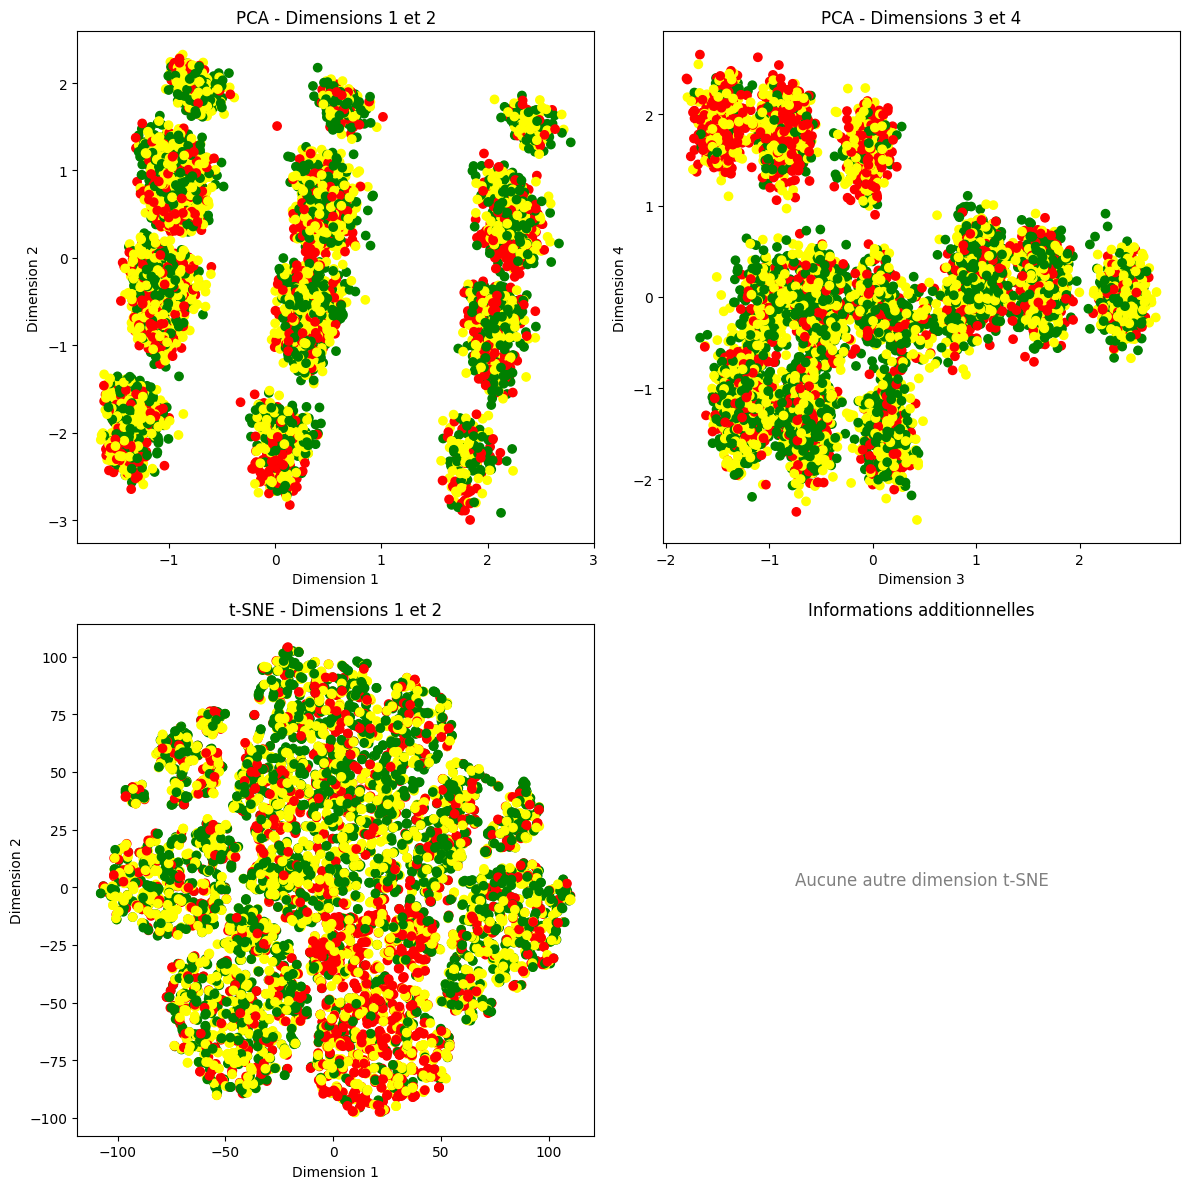

In [15]:

# Importation des bibliothèques nécessaires pour la visualisation et la réduction de dimensionnalité :
# matplotlib.pyplot pour créer des graphiques, PCA pour la réduction de dimensionnalité linéaire,
# et TSNE pour une réduction de dimensionnalité non linéaire.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Définition d'une graine aléatoire pour assurer la reproductibilité des résultats
random_seed = 42
# Définition des labels et des couleurs pour chaque classe
labels = outputs_category
coordinates = inputs_standardized_df
color_dict = {"Faible": "green", "Modéré": "yellow", "Élevé": "red"}
color_vec = [color_dict[label] for label in labels]

# Réduction de la dimensionnalité avec PCA
pca = PCA(n_components=4)  # On calcule les 4 premières dimensions, tel que demandé dans la consigne
print("Début de la réduction de la dimensionnalité avec PCA...")
pca_coords = pca.fit_transform(coordinates)
print("PCA terminée.")

# Réduction de la dimensionnalité avec t-SNE en 2 dimensions.
#P.S : les 4 dimensions avec T-SNE avec la méthode "exact", prennent trop de temps à s'exécuter pour cet exercice ; nous limitons à 2 dimensions.
print("Début de la réduction de la dimensionnalité avec t-SNE...")
tsne = TSNE(
    perplexity=5,  # Contrôle la balance entre les structures locales et globales
    n_components=2,  # Réduction à 2 dimensions
    learning_rate=200,  # Vitesse d'apprentissage pour accélérer le processus
    init='pca',  # Initialisation avec PCA
    method='barnes_hut',  # Algorithme rapide pour grands ensembles
    n_jobs=-1,  # Utilise tous les cœurs disponibles
    verbose=1,
    random_state=random_seed
)
# On sauvegarde des deux premières dimensions
tsne_coords_2d = tsne.fit_transform(coordinates)
print("Transformation t-SNE terminée.")

# On sépare des deux dimensions en variables distinctes. Utile pour la partie 4 de la consigne !
tsne_dim1 = tsne_coords_2d[:, 0]  # Première dimension
tsne_dim2 = tsne_coords_2d[:, 1]  # Deuxième dimension

# Création de la figure et affichage des graphiques
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# PCA - Dimensions 1 et 2
axs[0, 0].scatter(pca_coords[:, 0], pca_coords[:, 1], c=color_vec)
axs[0, 0].set_title("PCA - Dimensions 1 et 2")
axs[0, 0].set_xlabel("Dimension 1")
axs[0, 0].set_ylabel("Dimension 2")

# PCA - Dimensions 3 et 4
axs[0, 1].scatter(pca_coords[:, 2], pca_coords[:, 3], c=color_vec)
axs[0, 1].set_title("PCA - Dimensions 3 et 4")
axs[0, 1].set_xlabel("Dimension 3")
axs[0, 1].set_ylabel("Dimension 4")

# t-SNE - Dimensions 1 et 2
axs[1, 0].scatter(tsne_coords_2d[:, 0], tsne_coords_2d[:, 1], c=color_vec)
axs[1, 0].set_title("t-SNE - Dimensions 1 et 2")
axs[1, 0].set_xlabel("Dimension 1")
axs[1, 0].set_ylabel("Dimension 2")

# On laisse le dernier graphique vide avec un petit message informatif
axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.5, "Aucune autre dimension t-SNE", ha='center', va='center', fontsize=12, color='gray')
axs[1, 1].set_title("Informations additionnelles")

plt.tight_layout()
plt.show()

# On affiche la variance expliquée par les dimensions de la PCA.
explained_variance = pca.explained_variance_ratio_[:4]
print("Variance expliquée par les premières dimensions (PCA) :", explained_variance)




#**Commentaire 1.6 :**
#PCA
Concernant la variance expliquée (inertie), par nos 4 premières composantes de la PCA, nous remarquons qu'elles expliquent chacune une part très limitée de la variance de nos données d'entrée : 6,57%, 6,26%, 5,83%, et 5,35%. Ceci nous indique qu'il faudrait davantage de dimensions pour cerner l'information totale (ou du moins une bonne partie) de nos données d'entrée.

En outre, nous observons un regroupement en forme de grappes de nos points mais les classes de la variable cible ne sont pas bien séparées au sein de ces grappes. Ainsi, nous remarquons que les 4 premières dimensions de la PCA ne permettent pas de bien différencier, ni de prédire les classes de notre variable cible (les points rouge, jaunes et verts sont mélangés dans chacun des regroupements des points).  

Soulignons tout de fois un très léger regroupement des points rouge (classe "Elevée) dans la partie supérieure/gauche du graph des dimensions 3 et 4. Aussi, les points verts (classe "Faible") semblent se regrouper plutôt dans la partie inférieure du graph des dimensions 3 et 4.

# T-SNE

Pour le T-SNE, nous observons sur le graph des deux premières dimensions que les données d'entrées sont entassées en amas de points relativement bien formés. Toutefois, les trois couleurs de la variables cible sont présents dans chacun de ces amas de points et, à vue d'oeil, assez uniformément répartis dans ces groupes de points. Ainsi, des deux premières dimensions du t-sne ne permettent pas une claire différenciation des classes de notre variable cible.

Toutefois, il semble tout de même qu'on observe une légère tendance des points de classe "Faible" (en vert) à se regrouper dans la partie supérieure du graph, c'est-à-dire pour les valeurs élevées sur l'axe verticale("dimension 2"). Aussi, les points rouge de la classe "Elevé" semble se regrouper dans la partie inférieure du graphique, c'est-à-dire pour les valeurs faibles sur l'axe verticale ("dimension 2"). Bien que la séparation entre les classes ne soit pas nette, ces distributions suggèrent que la réduction de la dimensionalité avec les deux premières dimensions du t-SNE permet tout de même une légère différenciation des classes.





#**Partie 2 : Classification**

##2.1

In [16]:
# Importation de la fonction train_test_split pour diviser le jeu de données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split, GridSearchCV



# Séparer les données en jeux d'entraînement/validation et de test en utilisant mon output : "outputs_combined" et mes inputs "inputs_standardized_df"
#la taille du jeu de test comprend 20% de mes données
inputs_train_val, inputs_test, outputs_train_val, outputs_test = train_test_split(
    inputs_standardized_df, outputs_combined, test_size=0.2, stratify=outputs_combined, random_state=42
)

# Vérification des formes pour chaque jeu de données
print("inputs_train_val shape:", inputs_train_val.shape)
print("inputs_test shape:", inputs_test.shape)
print("outputs_train_val shape:", outputs_train_val.shape)
print("outputs_test shape:", outputs_test.shape)

# Afficher quelques exemples pour vérifier l'intégrité des jeux d'entraînement et de test
print("\nPremières lignes de inputs_train_val :")
print(inputs_train_val.head())

print("\nPremières lignes de outputs_train_val :")
print(outputs_train_val.head())




Variance expliquée par les premières dimensions (PCA) : [0.06565482 0.06255638 0.0582921  0.05356961]
inputs_train_val shape: (5617, 23)
inputs_test shape: (1405, 23)
outputs_train_val shape: (5617,)
outputs_test shape: (1405,)

Premières lignes de inputs_train_val :
           Age      CGPA  Financial_Stress  Semester_Credit_Load  Gender_Male  \
1899 -1.038850 -1.083980          0.320091              0.685960    -1.010307   
553   0.258604  1.040313          1.490453              1.374338    -1.010307   
5893 -0.260378 -1.014331          0.905272             -0.920256     0.989799   
5171 -0.779359  0.448297          0.320091             -0.920256    -1.010307   
2688 -0.260378  1.771627          1.490453             -0.231878    -1.010307   

      Course_Computer Science  Course_Engineering  Course_Law  Course_Medical  \
1899                -0.414131           -0.424462   -0.495679       -0.654299   
553                 -0.414131            2.355923   -0.495679       -0.654299   
58

Le jeu de donnée a bien été séparé en jeu d'entrainement et de test (c.f. les "shape" ci-dessus) avec "inputs_train_val", "outputs_train_val", "inputs_test" et "outputs_test".

Ajoutons encore quelques vérifications pour voir si il n'y a pas de valeurs manquantes sur toutes les données d'entrainement et exportons "train_val_combined.csv" pour avoir un aperçu des mes inputs.

In [17]:

# Réinitialiser les indices pour s'assurer d'un alignement correct
inputs_train_val = inputs_train_val.reset_index(drop=True)
outputs_train_val = outputs_train_val.reset_index(drop=True)

# Concaténer de manière synchronisée
train_val_combined = pd.concat([inputs_train_val, outputs_train_val], axis=1)

# Vérifier les valeurs manquantes après la concaténation
print("Valeurs manquantes dans train_val_combined :")
print(train_val_combined.isna().sum())

# Exporter la table combinée
train_val_combined.to_csv("train_val_combined.csv", index=False)


Valeurs manquantes dans train_val_combined :
Age                            0
CGPA                           0
Financial_Stress               0
Semester_Credit_Load           0
Gender_Male                    0
Course_Computer Science        0
Course_Engineering             0
Course_Law                     0
Course_Medical                 0
Course_Others                  0
Relationship_Status_Married    0
Relationship_Status_Single     0
Family_History_Yes             0
Chronic_Illness_Yes            0
Residence_Type_On-Campus       0
Residence_Type_With Family     0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Counseling_Service_Use         0
Extracurricular_Involvement    0
Substance_Use                  0
Anxiety_Score                  0
dtype: int64


##2.2

Entrainons désormais une régression logistique (Softmax) avec comme paramètres, les paramètres par défaut de sklearn. Nous laisserons donc que les paramètres par défaut lorsque nous initialisons le modèle et n'ajoutons pas d'autres paramètres.
Ce premier modèle que nous entrainons sera notre baseline pour la suite, c'est-à-dire qu'il servira de comparaison avec les autres modèles pour évaluer si les autres modèles performent mieux, de façon similaire ou moins biens. Pour se faire, nous devons utiliser différentes mesures :
1. Exactitude ("accuracy") : Mesure le pourcentage de prédictions correctes parmi toutes les prédictions effectuées (positives et négatives confondues)
2. Précision ("Precision") : Indique le pourcentage de prédictions positives qui sont effectivement correctes.
3. Rappel ("Recall") : Indique le pourcentage d'observations positives réelles qui ont été correctement identifiées par le modèle.
4. F1_score : Moyenne harmonique de la précision et du rappel, utilisée pour évaluer le compromis entre ces deux mesures.

In [18]:
# Importation de LogisticRegression pour construire un modèle de régression logistique
from sklearn.linear_model import LogisticRegression

# Importation de fonctions d'évaluation pour mesurer la performance du modèle
# make_scorer pour créer des métriques personnalisées
# accuracy_score pour évaluer l'exactitude
# precision_score pour évaluer la précision
# recall_score pour évaluer le rappel
from sklearn.metrics import make_scorer, accuracy_score, \
  precision_score, recall_score

In [19]:
#Nous ajoutons le F1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialiser le modèle de régression logistique multinomiale avec softmax en prenant les paramètres par défaut
logistic_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10000)

# Entraîner le modèle sur les données d'entraînement/validation
logistic_reg.fit(inputs_train_val, outputs_train_val)

# Prédictions sur les jeux d'entraînement/validation et de test
train_val_pred = logistic_reg.predict(inputs_train_val)
test_pred = logistic_reg.predict(inputs_test)


# Calculer les métriques pour le jeu d'entraînement/validation
# Utilisation de "weighted" pour prendre en compte le déséquilibre des classes,
# en pondérant les scores selon la fréquence de chaque classe
train_val_accuracy = accuracy_score(outputs_train_val, train_val_pred)
train_val_precision = precision_score(outputs_train_val, train_val_pred, average="weighted", zero_division=0)
train_val_recall = recall_score(outputs_train_val, train_val_pred, average="weighted", zero_division=0)
train_val_f1 = f1_score(outputs_train_val, train_val_pred, average="weighted", zero_division=0)

# Calculer les métriques pour le jeu de test
test_accuracy = accuracy_score(outputs_test, test_pred)
test_precision = precision_score(outputs_test, test_pred, average="weighted", zero_division=0)
test_recall = recall_score(outputs_test, test_pred, average="weighted", zero_division=0)
test_f1 = f1_score(outputs_test, test_pred, average="weighted", zero_division=0)

# Afficher les résultats
print("Métriques sur le jeu d'entraînement/validation :")
print(f"Exactitude (Accuracy) : {train_val_accuracy:.4f}")
print(f"Précision (Precision) : {train_val_precision:.4f}")
print(f"Rappel (Recall) : {train_val_recall:.4f}")
print(f"Mesure F1 : {train_val_f1:.4f}")

print("\nMétriques sur le jeu de test :")
print(f"Exactitude (Accuracy) : {test_accuracy:.4f}")
print(f"Précision (Precision) : {test_precision:.4f}")
print(f"Rappel (Recall) : {test_recall:.4f}")
print(f"Mesure F1 : {test_f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Métriques sur le jeu d'entraînement/validation :
Exactitude (Accuracy) : 0.4365
Précision (Precision) : 0.4408
Rappel (Recall) : 0.4365
Mesure F1 : 0.4290

Métriques sur le jeu de test :
Exactitude (Accuracy) : 0.4214
Précision (Precision) : 0.4261
Rappel (Recall) : 0.4214
Mesure F1 : 0.4140


Nos différents scores sont affichés.

Nous observons que notre modèle de régression logistique avec les paramètres par défaut = notre baseline, est capable de classer correctement environ 43.65% des instances sur l'ensemble d'entrainement/validation et 42.14% sur le jeu de test, quelle que soit la classe cible. Ainsi, bien que le modèle montre une généralisation relativement stable entre le jeu d'entrainement/validation et de test, il peine à classifier correctement nos différentes classes.

En tenant compte de la fréquence de chaque classe (« Faible », « Modéré », « Élevé »), le modèle de régression logistique multinomiale montre qu'environ 44.08 % des prédictions pour le jeu d'entraînement correspondent effectivement à la classe correcte. Pour le jeu de test, environ 42.61 % des prédictions correspondent à la classe correcte. La précision étant proche de l'exactitude, cela suggère que le modèle n'est ni particulièrement biaisé en faveur d'une classe spécifique ni extrêmement précis.

Egalement calculé sur chaque classe et pondéré, le modèle atteint un rappel de 0,4365, ce qui signifie qu'en moyenne, 43.65 % des observations de chaque classe sont correctement identifiées comme appartenant à leur classe respective pour le jeu d'entrainement/validation. Pour l'ensemble de test, le rappel est de 0,4214, indiquant qu'environ 42.14 % des observations de chaque classe sont retrouvées correctement dans le jeu de test, toujours en tenant compte de la proportion de chaque classe. Comme le rappel est similaire à l’exactitude, cela pourrait signifier que le modèle identifie bien les observations de chaque classe sans être trop biaisé par une classe en particulier.

Enfin, le modèle indique un "f1_score" qui est égal à 42.9% pour le jeu d'entrainement/validation et 41.4% pour le jeu de test. Comme les métriques du f1_score sont plus faibles que celles de la précision et du rappel, cela indique que le modèle ne parvient pas à atteindre un compromis optimal entre identifier toutes les classes et les prédires correctement sans erreurs pour le jeu d'entrainement/validation et test.




##2.3

In [20]:
#Importation des modules nécessaires pour l'algorithme KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
#Pour utiliser le modèle de SVM (Support Vector Machine) pour la classification
from sklearn.svm import SVC

[0.001      0.02726316 0.05352632 0.07978947 0.10605263 0.13231579
 0.15857895 0.18484211 0.21110526 0.23736842 0.26363158 0.28989474
 0.31615789 0.34242105 0.36868421 0.39494737 0.42121053 0.44747368
 0.47373684 0.5       ]
Entraînement pour le kernel : Polynomial (degré 3)
Meilleur gamma pour Polynomial (degré 3): 0.027263157894736843
Meilleure exactitude de validation pour Polynomial (degré 3): 0.4077
Entraînement pour le kernel : RBF
Meilleur gamma pour RBF: 0.001
Meilleure exactitude de validation pour RBF: 0.4145
Entraînement pour le kernel : Sigmoid (tanh)
Meilleur gamma pour Sigmoid (tanh): 0.001
Meilleure exactitude de validation pour Sigmoid (tanh): 0.4130


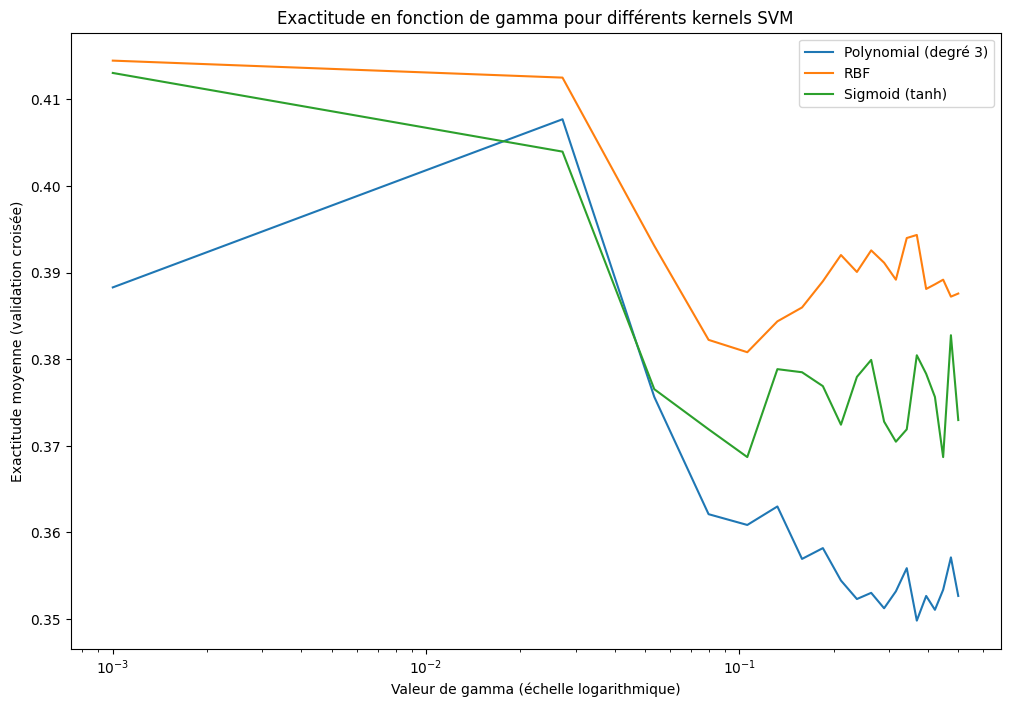

In [21]:
#Source : https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn
from sklearn.exceptions import ConvergenceWarning
import warnings


# Nous définissons une plage de valeurs pour le paramètre gamma, répartie entre 0.001 et 0.5
# Cette plage sera utilisée pour optimiser les différents modèles SVM
gamma_values = np.linspace(0.001, 0.5, 20)
print(gamma_values)


# Fixer C à 5 et le nombre maximal d'itérations pour SVC
C_value = 5
max_iter_value = 10000

#Ignorer les warnings de convergence, on aurait pu prendre un "max_iter_value" pour satisfaire pleinement les convergences
#mais le temps d'exécution aurait été trop long pour respecter les 20min. de la consigne ! source :
warnings.filterwarnings("ignore", category=ConvergenceWarning)


#les différents kernels à tester et leurs paramètres
kernels = {
    "Polynomial (degré 3)": {"kernel": "poly", "degree": 3},
    "RBF": {"kernel": "rbf"},
    "Sigmoid (tanh)": {"kernel": "sigmoid"}
}


# Dictionnaire pour stocker les résultats de chaque kernel
results = {}

# Boucle sur chaque kernel pour effectuer la recherche avec GridSearchCV
for kernel_name, kernel_params in kernels.items():
    print(f"Entraînement pour le kernel : {kernel_name}")

    # Définir le modèle SVM avec le kernel spécifique et les paramètres généraux définis plus haut
    svm_model = SVC(
        C=C_value,
        kernel=kernel_params["kernel"],
        degree=kernel_params.get("degree", 3),
        max_iter=max_iter_value
    )

    # Définir les paramètres pour GridSearchCV : recherche uniquement sur gamma
    param_grid = {"gamma": gamma_values}

    # Utiliser GridSearchCV pour tous les kernels avec 4 folds pour la validation croisée
    search = GridSearchCV(svm_model, param_grid=param_grid, cv=4, scoring="accuracy")

    ## Entraîner GridSearchCV sur les données d'entraînement/validation pour identifier le meilleur gamma
    search.fit(inputs_train_val, outputs_train_val)

    # Extraire les meilleurs scores et les meilleures valeurs de gamma pour chaque kernel
    best_gamma = search.best_params_['gamma']
    best_score = search.best_score_
    results[kernel_name] = {"best_gamma": best_gamma, "best_score": best_score, "accuracy": search.cv_results_["mean_test_score"]}

    print(f"Meilleur gamma pour {kernel_name}: {best_gamma}")
    print(f"Meilleure exactitude de validation pour {kernel_name}: {best_score:.4f}")

# Visualisation des courbes d'exactitude en fonction de gamma pour chaque kernel
plt.figure(figsize=(12, 8))
for kernel_name, result in results.items():
    plt.plot(gamma_values, result["accuracy"], label=f"{kernel_name}")

plt.xscale("log")
plt.xlabel("Valeur de gamma (échelle logarithmique)")
plt.ylabel("Exactitude moyenne (validation croisée)")
plt.title("Exactitude en fonction de gamma pour différents kernels SVM")
plt.legend()
plt.show()





##2.4

#**Commentaire 2.4 (1)**

Le Support Vector Machine (SVM) est une méthode de classification supervisée qui tente de trouver une frontière optimale séparant les classes en maximisant la distance entre les points de chaque classe les plus proches de cette frontière. Le SVM utilise des kernels, des fonctions qui permettent de transformer les données dans un espace de dimension supérieure pour rendre les classes plus facilement séparables (Géron, 2019).

Dans notre cas, en observant les courbes de l'exactitude en fonction des différentes valeurs de gamma pour chacun de nos kernels SVM, le kernel "RBF" (𝑘(x𝑖 , x𝑗 ) = exp(−𝛾∥x𝑖 − x𝑗 ∥2)) avec une valeur gamma = 0.001 affiche la meilleure exactitude (=0.4145) pour nos différents modèles SVM. De manière générale, nous pouvons en effet voir que la ligne orange, correspondant au modèle SVM avec le kernel "rbf", est le plus performant pour classer nos données d'entrainement/validation, quel que soit la valeur de gamma dans notre plage de valeurs. Nous retenons ainsi ce modèle.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Récupérer le meilleur gamma pour le kernel "RBF" retenu à partir des résultats précédemment calculés
best_svm_gamma = results["RBF"]["best_gamma"]

# Chargement du modèle SVM avec le meilleur gamma et le kernel rbf
best_svm_model = SVC(C=5, kernel="rbf", gamma=best_svm_gamma, max_iter=10000, random_state=42)


# Entrainer le modèle sur les données d'entrainement/validation
best_svm_model.fit(inputs_train_val, outputs_train_val)

# Prédictions sur les jeux d’entraînement/validation et de test
svm_train_val_pred = best_svm_model.predict(inputs_train_val)
svm_test_pred = best_svm_model.predict(inputs_test)

# Calcul des métriques de notre meilleur modèle SVM (=RBF)
svm_train_val_accuracy = accuracy_score(outputs_train_val, svm_train_val_pred)
svm_train_val_precision = precision_score(outputs_train_val, svm_train_val_pred, average="weighted")
svm_train_val_recall = recall_score(outputs_train_val, svm_train_val_pred, average="weighted")
svm_train_val_f1 = f1_score(outputs_train_val, svm_train_val_pred, average="weighted")

svm_test_accuracy = accuracy_score(outputs_test, svm_test_pred)
svm_test_precision = precision_score(outputs_test, svm_test_pred, average="weighted")
svm_test_recall = recall_score(outputs_test, svm_test_pred, average="weighted")
svm_test_f1 = f1_score(outputs_test, svm_test_pred, average="weighted")


# Affichage des résultats
print("\nComparaison entre le meilleur modèle SVM et la baseline\n")

print("=== Meilleur modèle SVM (=RBF) ===")
print(f"Exactitude (train/val) : {svm_train_val_accuracy:.4f}, (test) : {svm_test_accuracy:.4f}")
print(f"Précision (train/val) : {svm_train_val_precision:.4f}, (test) : {svm_test_precision:.4f}")
print(f"Rappel (train/val) : {svm_train_val_recall:.4f}, (test) : {svm_test_recall:.4f}")
print(f"Mesure F1 (train/val) : {svm_train_val_f1:.4f}, (test) : {svm_test_f1:.4f}")

print("\n=== Baseline (Régression Logistique Multinomiale) ===")
print(f"Exactitude (train/val) : {train_val_accuracy:.4f}, (test) : {test_accuracy:.4f}")
print(f"Précision (train/val) : {train_val_precision:.4f}, (test) : {test_precision:.4f}")
print(f"Rappel (train/val) : {train_val_recall:.4f}, (test) : {test_recall:.4f}")
print(f"Mesure F1 (train/val) : {train_val_f1:.4f}, (test) : {test_f1:.4f}")



Comparaison entre le meilleur modèle SVM et la baseline

=== Meilleur modèle SVM (=RBF) ===
Exactitude (train/val) : 0.4226, (test) : 0.4335
Précision (train/val) : 0.2677, (test) : 0.2774
Rappel (train/val) : 0.4226, (test) : 0.4335
Mesure F1 (train/val) : 0.3091, (test) : 0.3159

=== Baseline (Régression Logistique Multinomiale) ===
Exactitude (train/val) : 0.4365, (test) : 0.4214
Précision (train/val) : 0.4408, (test) : 0.4261
Rappel (train/val) : 0.4365, (test) : 0.4214
Mesure F1 (train/val) : 0.4290, (test) : 0.4140


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#**commentaire 2.4 (2)**

Les résultats ci-dessus nous montre une comparaison entre les métriques de l'exactitude, de la précision, du rappel et du f1_score pour notre meilleur modèle SVM selon l'exactitude avec le kernel "RBF" (kernel retenu, c.f. commentaire 2.4(1)) et notre "baseline" qui est le modèle de régression logistique avec les paramètres par défaut. En comparant ces deux modèles, nous pouvons effectivement voir s'il y a eu des amélioration ou non selon les différentes métriques pour ces deux modèles sur le jeu d'entrainement/validation et de test :

Sur le jeu d'entraînement/validation, le modèle SVM avec kernel "RBF" atteint une exactitude de 42.26 %, légèrement inférieure à celle de la baseline (43.65 %). Toutefois, sur le jeu de test, l'exactitude s'améliore légèrement à 43.35 % et dépasse l'exactitude de notre "baseline", ce qui indique que ce modèle pourrait être intéressant à utiliser plus tard dans ce travail pour classifier au mieux nos données.
Aussi, le rappel dans le jeu de test du modèle SVM (et similaire à l'exactitude) est supérieur à notre baseline ; ceci indique une meilleure capacité de retrouver les observation de chaque classe dans les données de test.

Toutefois, la précision est nettement moins bonne (26.77 % pour l'entraînement/validation et 27.74 % pour le test) que notre baseline (44.08% pour l'entraînement/validation et 42.61% pour le test), indiquant que le SVM avec le kernel "RBF" n'arrive pas à prédire correctement certaines classes dans le jeu d'entrainement/validation et de test. En outre, il est intéressant d'observer le message d'erreur "Precision is ill-defined and being set to 0.0 in labels with no predicted samples."
, nous indiquant qu'une des classe n'arrive pas à être correctement prédite dans notre modèle SVM avec le kernel "RBF" ; ceci pourrait expliquer sa mauvaise performance en comparaison de notre baseline. En ayant creusé la question, j'ai découvert grâce à une matrice de confusion que c'était notre classe minoritaire "Elevé" qui n'était pas prédite par ce modèle.

Le f1_score du SVM est également nettement moins performant pour le jeu d'entrainement/validation et sur le jeu de test que la baseline. Ceci pourrait s'expliquer par la mauvaise précision du modèle sur les données d'entrainement et de test.

Pour résumer, notre baseline semble généralement meilleure sur nos différentes métriques et sur les données d'entrainement/validation. Sur les données de test, le modèle SVM est plus performant pour l'exactitude et le rappel et il serait intéressant de le rendre globalement plus performant que notre baseline si nous trouvons un moyen de régler sa mauvaise précision et son mauvais f1_score (Nous verrons ceci aux points 4.3 et 4.4 de la consigne).






#**Partie 3 : Clustering**

Passons maintenant à des méthodes de clustering qui vont permettre de segmenter nos données d'entrées standardisées sans utiliser les labels des classes (méthodes non-supervisées). Nous comparerons ensuite ces résultats avec nos méthodes supervisées effectuées avant. Pour se faire nous allons utiliser deux méthodes de clustering :

1. Le Clustering Hiérarchique Agglomératif (HAC) qui est une méthode permettant de regrouper nos données d'entrées de manière hiérarchique en partant des points individuels et en les regroupant progressivement en clusters plus larges. Cette méthode est itérative étant donné qu'elle agrège les points les plus proches puis recalcule à chaque fois les distances  entre les nouveaux clusters et les autres points.

2. Le Gaussian Mixture Model (GMM) qui est une méthode de clustering probabiliste qui cherche à modéliser la distribution des données comme une combinaison de plusieurs distributions normales. Pour se faire, le GMM attribue à chaque point une probabilité d'appartenance à chaque cluster en fonction des distributions normales.

##3.1

Nombre de groupes: 2, Score de Calinski-Harabasz: 350.3493
Nombre de groupes: 3, Score de Calinski-Harabasz: 362.2860
Nombre de groupes: 4, Score de Calinski-Harabasz: 376.1063
Nombre de groupes: 5, Score de Calinski-Harabasz: 389.4333
Nombre de groupes: 6, Score de Calinski-Harabasz: 402.1465
Nombre de groupes: 7, Score de Calinski-Harabasz: 380.4841
Nombre de groupes: 8, Score de Calinski-Harabasz: 361.5292
Nombre de groupes: 9, Score de Calinski-Harabasz: 336.5663
Nombre de groupes: 10, Score de Calinski-Harabasz: 311.5044
Nombre de groupes: 11, Score de Calinski-Harabasz: 289.3559
Nombre de groupes: 12, Score de Calinski-Harabasz: 271.1912


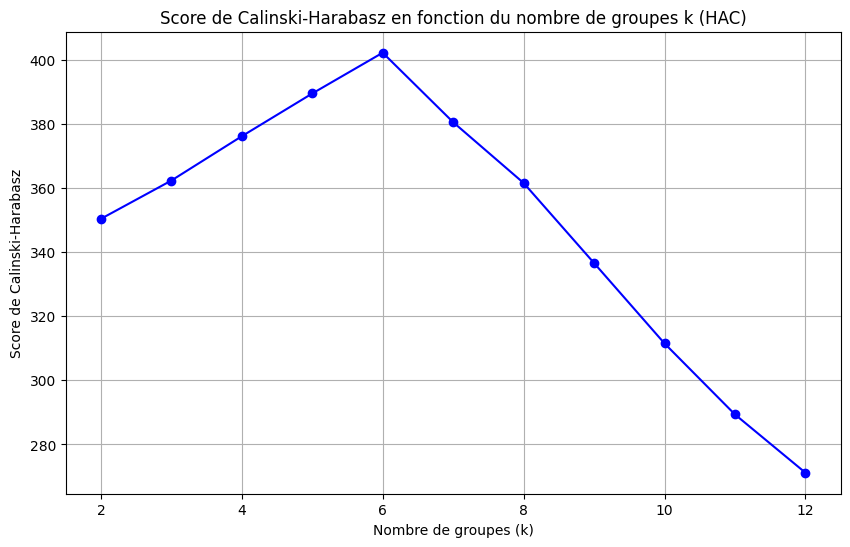

Meilleur nombre de groupes (k) selon le score de Calinski-Harabasz : 6


In [23]:
# Importation de la classe AgglomerativeClustering pour effectuer le clustering hiérarchique agglomératif
from sklearn.cluster import AgglomerativeClustering
# Importation de la fonction calinski_harabasz_score pour évaluer la qualité du clustering
from sklearn.metrics import calinski_harabasz_score


# prenons toutes nos variables d'entrées standardisées
inputs_standardized_hac = inputs_standardized_df

# Définir la plage des valeurs de k (nombre de clusters/groupes) à tester
k_values = range(2, 13)
# Initialisation d'une liste pour stocker les scores de Calinski-Harabasz pour chaque valeur de k
calinski_harabasz_scores = []

# Calculer le score de Calinski-Harabasz pour chaque nombre de groupes
for k in k_values:
    # Appliquer le clustering hiérarchique agglomératif pour chaque nombre de groupes (k)
    hac = AgglomerativeClustering(n_clusters=k)
    # Ajuster le modèle et obtenir les labels de cluster pour chaque point de données
    hac_labels = hac.fit_predict(inputs_standardized_hac)

    # Calculer le score de Calinski-Harabasz pour le clustering obtenu avec k clusters
    score = calinski_harabasz_score(inputs_standardized_hac, hac_labels)
    # Enregistrer le score de Calinski-Harabasz pour la valeur de k calculée
    calinski_harabasz_scores.append(score)
    # Afficher le nombre de groupes et le score de Calinski-Harabasz pour avoir un suivi
    print(f"Nombre de groupes: {k}, Score de Calinski-Harabasz: {score:.4f}")

# Créer une figure pour visualiser le score de Calinski-Harabasz en fonction du nombre de clusters k
plt.figure(figsize=(10, 6))
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='b')
plt.xlabel("Nombre de groupes (k)")
plt.ylabel("Score de Calinski-Harabasz")
plt.title("Score de Calinski-Harabasz en fonction du nombre de groupes k (HAC)")
plt.grid(True)
plt.show()

# Trouver et afficher le meilleur k (celui avec le score Calinski-Harabasz le plus élevé)
best_k_hac = k_values[np.argmax(calinski_harabasz_scores)]
print(f"Meilleur nombre de groupes (k) selon le score de Calinski-Harabasz : {best_k_hac}")


#**Commentaire 3.1**
Nous pouvons observer différents éléments ici. Le score "Calinski Harabasz" augmente au fur et à mesure que le nombre de clusters passe de 2 à 6, atteignant un pic à k = 6 avec un score de 402.1465. Cela suggère que, pour cette valeur de k, le modèle de clustering hiérarchique agglomératif (HAC) forme des clusters bien séparés et compacts. Nous retenons donc k=6, comme valeur du nombre de groupe à retenir.

 Toutefois, il faut faire attention à cette analyse. En effet, ces résultats ne permettent pas d'indiquer pour l'instant si les clusters correspondent à nos classes cibles ("Faible", "Modéré", "Elevé"). Nous utiliserons plus tard "Adjusted Mutual Information (AMI), "Homogeneity_score" et "completeness_score" pour savoir si le meilleur modèle de clustering retenu ici permet de correctement segmenter les données en fonction de nos classes cibles.

##3.2

Nombre de groupes: 2, Score de Calinski-Harabasz: 374.2706
Nombre de groupes: 3, Score de Calinski-Harabasz: 369.1509
Nombre de groupes: 4, Score de Calinski-Harabasz: 420.4442
Nombre de groupes: 5, Score de Calinski-Harabasz: 444.5612
Nombre de groupes: 6, Score de Calinski-Harabasz: 403.3790
Nombre de groupes: 7, Score de Calinski-Harabasz: 359.2972
Nombre de groupes: 8, Score de Calinski-Harabasz: 306.2737
Nombre de groupes: 9, Score de Calinski-Harabasz: 317.3127
Nombre de groupes: 10, Score de Calinski-Harabasz: 292.7185
Nombre de groupes: 11, Score de Calinski-Harabasz: 275.4326
Nombre de groupes: 12, Score de Calinski-Harabasz: 260.4805


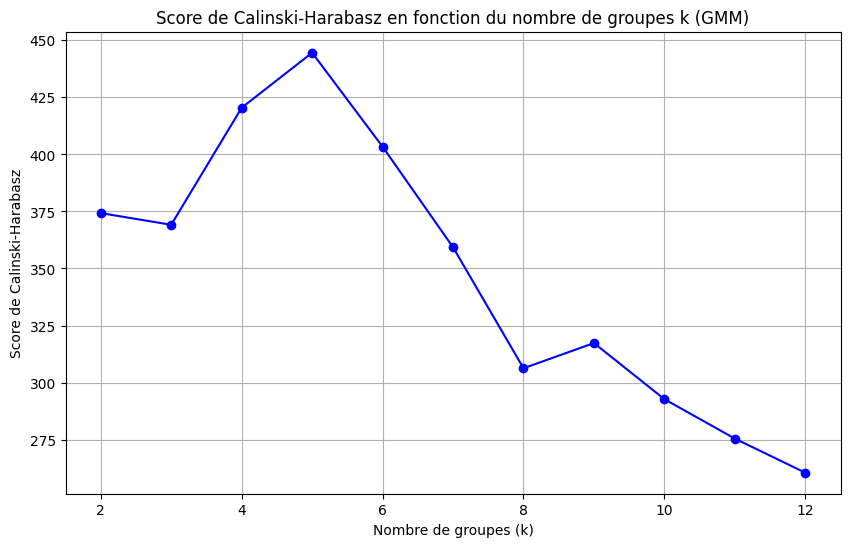

Meilleur nombre de groupes (k) pour GMM selon le score de Calinski-Harabasz : 5


In [24]:
from sklearn.preprocessing import StandardScaler
# Importation de la classe GaussianMixture depuis scikit-learn
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score

# prenons toutes nos variables d'entrées standardisées
inputs_standardized_GMM = inputs_standardized_df

# Définir la plage des valeurs de k (nombre de clusters/groupes) à tester
k_values = range(2, 13)
# Initialisation d'une liste pour stocker les scores de Calinski-Harabasz pour chaque valeur de k
calinski_harabasz_scores_gmm = []

# Calculer le score de Calinski-Harabasz pour chaque nombre de groupes
for k in k_values:
    # Création du modèle GMM pour k clusters
    gmm = GaussianMixture(n_components=k, random_state=42)
    # Ajuster le modèle et obtenir les labels de cluster pour chaque point de données
    gmm_labels = gmm.fit_predict(inputs_standardized_GMM)

    # Calculer le score de Calinski-Harabasz pour le clustering obtenu avec k clusters
    score = calinski_harabasz_score(inputs_standardized_GMM, gmm_labels)
    # Enregistrer le score de Calinski-Harabasz pour la valeur de k calculée
    calinski_harabasz_scores_gmm.append(score)
    # Afficher le nombre de groupes et le score de Calinski-Harabasz pour avoir un suivi
    print(f"Nombre de groupes: {k}, Score de Calinski-Harabasz: {score:.4f}")

# Créer une figure pour visualiser le score de Calinski-Harabasz en fonction du nombre de clusters k
plt.figure(figsize=(10, 6))
plt.plot(k_values, calinski_harabasz_scores_gmm, marker='o', color='b')
plt.xlabel("Nombre de groupes (k)")
plt.ylabel("Score de Calinski-Harabasz")
plt.title("Score de Calinski-Harabasz en fonction du nombre de groupes k (GMM)")
plt.grid(True)
plt.show()

# Trouver et afficher le meilleur k (celui avec le score Calinski-Harabasz le plus élevé)
best_k_gmm = k_values[np.argmax(calinski_harabasz_scores_gmm)]
print(f"Meilleur nombre de groupes (k) pour GMM selon le score de Calinski-Harabasz : {best_k_gmm}")


#**commentaire 3.2**
Le score atteint son maximum à k=5, avec une valeur de 444.5612. Cela suggère que le modèle GMM forme des clusters de meilleure qualité avec cinq groupes, en termes de séparation et de compacité. Par conséquent, k=5 est considéré comme le nombre optimal de clusters selon cette mesure. Nous retenons donc k=5, comme valeur du nombre de groupe à retenir.

 Toutefois, comme pour le HAC, il faut faire attention à cette analyse. En effet, ces résultats ne permettent pas d'indiquer pour l'instant si les clusters correspondent à nos classes cibles ("Faible", "Modéré", "Elevé"). Nous utiliserons plus tard "Adjusted Mutual Information (AMI), "Homogeneity_score" et "completeness_score" pour savoir si le meilleur modèle de clustering retenu ici permet de correctement segmenter les données en fonction de nos classes cibles.

##3.3

In [25]:
# Importation des métriques pour évaluer la qualité des clusters
from sklearn.metrics import adjusted_mutual_info_score, homogeneity_score, completeness_score

# Appliquer le meilleur k (retenu précédemment pour HAC et GMM) pour calculer les scores AMI, homogénéité, et complétude
best_k_hac = 6
best_k_gmm = 5

# Calculer les labels en utilisant le clustering hiérarchique agglomératif avec le meilleur k
hac = AgglomerativeClustering(n_clusters=best_k_hac)
hac_labels = hac.fit_predict(inputs_standardized_df)

# Calculer les labels en utilisant GMM avec le meilleur k
gmm = GaussianMixture(n_components=best_k_gmm, random_state=42)
gmm_labels = gmm.fit_predict(inputs_standardized_GMM)

# Calcul des métriques pour HAC
#Adjusted Mutual Information pour HAC
hac_ami = adjusted_mutual_info_score(outputs_combined, hac_labels)
#homogeneity_score pour HAC
hac_homog = homogeneity_score(outputs_combined, hac_labels)
# completeness_score pour HAC
hac_comp = completeness_score(outputs_combined, hac_labels)

# Calcul des métriques pour GMM
gmm_ami = adjusted_mutual_info_score(outputs_combined, gmm_labels)
#homogeneity_score pour GMM
gmm_homog = homogeneity_score(outputs_combined, gmm_labels)
#completeness_score pour GMM
gmm_comp = completeness_score(outputs_combined, gmm_labels)

# Affichage des résultats
print(f"Clustering Hiérarchique Agglomératif (HAC) avec k={best_k_hac} :")
print(f"- Adjusted Mutual Information (AMI) : {hac_ami:.4f}")
print(f"- Homogénéité : {hac_homog:.4f}")
print(f"- Complétude : {hac_comp:.4f}")

print(f"\nGaussian Mixture Model (GMM) avec k={best_k_gmm} :")
print(f"- Adjusted Mutual Information (AMI) : {gmm_ami:.4f}")
print(f"- Homogénéité : {gmm_homog:.4f}")
print(f"- Complétude : {gmm_comp:.4f}")


Clustering Hiérarchique Agglomératif (HAC) avec k=6 :
- Adjusted Mutual Information (AMI) : 0.0245
- Homogénéité : 0.0308
- Complétude : 0.0210

Gaussian Mixture Model (GMM) avec k=5 :
- Adjusted Mutual Information (AMI) : 0.0315
- Homogénéité : 0.0379
- Complétude : 0.0276


#**Commentaire 3.3**

Revenons sur nos différentes métriques obtenues.
1. L'AMI mesure la similarité entre les clusters prédits et les vraies classes cibles ("Faible", "Modéré" et "Elevé"), en tenant compte du hasard. Ici, les résultats de AMI pour le GMM et HAC sont relativement faibles (0.0245 pour HAC et 0.0315 pour GMM). Cela indique que les clusters obtenus avec le meilleur k ne correspondent que très peu aux classes cibles. La quantité d'information partagée entre les deux partitions (clusters prédits par GMM/HAC et les classes cibles) est faible et les clusters formés par GMM et HAC (très proche de 0) seraient presque aussi informatifs qu'une partition aléatoire (Géron, 2019). Autrement dit, les regroupements obtenus avec le meilleur k n'apportent que très peu d'information sur les classes d'origine.

2. L'homogénéité va nous permettre de dire à quel point les clusters formés par HAC et GMM avec le meilleur k sont composés d'éléments d'une même classe cible. Comme les résultats sont très faibles pour HAC et GMM (0.0308 pour HAC et 0.0379 pour GMM), il semble que les classes cibles sont mélangées au sein des clusters

3. La complétude mesure dans quelle mesure tous les éléments d’une même classe cible sont regroupés dans un même cluster. Les scores bas obtenus pour nos "meilleurs" partitions GMM et HAC (0.0210 pour HAC et 0.0276 pour GMM) indiquent que les éléments d'une même classe sont dispersés dans plusieurs clusters.



##3.4

In [26]:
from sklearn.metrics import adjusted_mutual_info_score

# Meilleur modèle basé sur le score AMI entre HAC et GMM
if gmm_ami > hac_ami:
    best_clustering_labels = gmm_labels
    best_k = best_k_gmm
    best_method = "GMM"
else:
    best_clustering_labels = hac_labels
    best_k = best_k_hac
    best_method = "HAC"

#affichez la méthode retenue en fonction du meilleur AMI entre HAC et GMM
print(f"Meilleure méthode de clustering retenue : {best_method} avec k={best_k}")

# Nous refaisons le calcul du AMI pour la méthode retenue sur toutes les données
best_clustering_ami = adjusted_mutual_info_score(outputs_combined, best_clustering_labels)
print(f"AMI pour la méthode de clustering {best_method} avec toutes les données : {best_clustering_ami:.4f}")

# AMI pour la baseline (régression logistique multinomiale)
logistic_ami = adjusted_mutual_info_score(outputs_combined, logistic_reg.predict(inputs_standardized_df))

# AMI pour le modèle SVM
svm_ami = adjusted_mutual_info_score(outputs_combined, best_svm_model.predict(inputs_standardized_df))

# Affichage des résultats pour avoir une approche comparative
print("\nComparaison des AMI :")
print(f"- Méthode de clustering {best_method} : AMI = {best_clustering_ami:.4f}")
print(f"- Baseline = Régression Logistique Multinomiale) : AMI = {logistic_ami:.4f}")
print(f"- Meilleur model retenu (point 2.4) SVM : AMI = {svm_ami:.4f}")


Meilleure méthode de clustering retenue : GMM avec k=5
AMI pour la méthode de clustering GMM avec toutes les données : 0.0315

Comparaison des AMI :
- Méthode de clustering GMM : AMI = 0.0315
- Baseline = Régression Logistique Multinomiale) : AMI = 0.0383
- Meilleur model retenu (point 2.4) SVM : AMI = 0.0516


#**commentaire 3.4**

Le meilleur modèle de clustering retenu en comparant le score AMI (avec leurs meilleurs k) est GMM. Toutefois, le score de 0.035 de ce modèle reste très bas, indiquant peu de correspondances entre les clusters créés par ce modèle et les classes cibles du score d'anxiété.

Nous observons que notre baseline (soit la régression logistique multinomiale) fait mieux, avec un score AMI de 0.0385. Ceci indique une légère amélioration mais les classes prédites par la baseline ne permettent toutefois pas une bonne correspondance (similarité) avec les classes cibles. En d'autres termes, les labels prédits par la baseline et les labels réels ne coincident que très peu (en tenant compte des variations aléatoires).

Enfin, les résultats montrent que le SVM avec le kernel "RBF" est finalement le "meilleur" modèle parmi les trois pour capturer la structure des classes cibles dans les données (0.0516). Bien que ce score reste relativement bas, il indique une meilleure correspondance entre les prédictions du SVM et les classes réelles comparativement aux autres modèles. Il semble que la non-linéarité de ce modèle permet donc une meilleur captation de la complexité de nos classes cibles.

De manière générale, les classes de la variable cible (Anxiety_score) semblent être difficile à cerner pour nos différents modèles. Ces score AMI faibles et proches de 0 appuie cet argument et montre leur difficulté à bien distinguer les classes cibles.

Désormais, nous pouvons passer aux méthodes mixtes :

#**Partie 4 : Méthode mixte**

##4.1 et 4.2

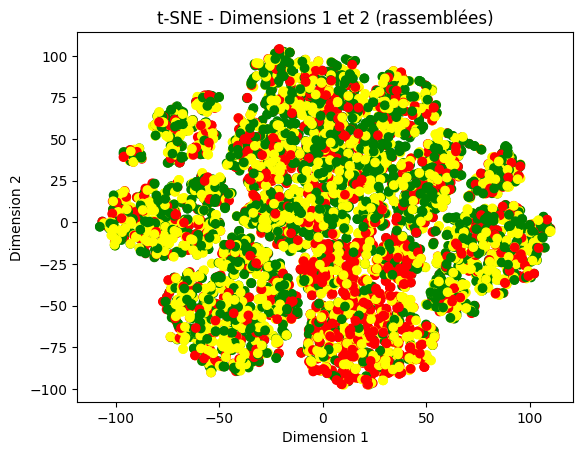

In [27]:
# Création d'un DataFrame pour plus de clarté dans la manipulation des données,
#en séparant la dimension 1 et la dimension 2 de notre t_sne calculé dans le point 1.6 du notebook
tsne_df = pd.DataFrame({'Dimension 1': tsne_dim1, 'Dimension 2': tsne_dim2, 'Label': labels})

# Rappel du point 1.6 du notebook : Visualisation pour vérifier la séparation des dimensions de nos deux variables.
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=color_vec)
plt.title("t-SNE - Dimensions 1 et 2 (rassemblées)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()




Nous avons choisi de prendre les deux premières dimensions du t-sne pour nos méthodes mixtes après avoir comparé les deux premières dimensions du t-SNE et du PCA (c.f. point 1.6). Il en résulte, selon les affichages (c.f. 1.6), une "meilleure" distinction des classes à prédire dans les deux premières dimensions du t-SNE que dans la PCA. Notre principal argument est le fait qu'il existe une zone avec beaucoup de points rouges rassemblés dans l'affichage du t-SNE correspondant à la classe "Elevé" (c.f. les valeurs de 0 à -100 de la dimension 2 de l'axe vertical). Les 2 premières dimensions du PCA, au contraire, n'affiche aucune séparation claire des classes cibles.

En outre, concernant la méthode que nous souhaitons utiliser et qui nous semble la plus performante, nous avons vu précédemment que la baseline (régression logistique multinomiale) et le SVM avec le kernel "RBF" étaient tous les deux des modèles avec les meilleures performances (c.f. commentaire 2.4). Toutefois, nous avons discuté de leurs différences de performance : pour le SVM, kernel "RBF", l'accuracy et le rappel sur les données de test étaient plus performant que la baseline. Au contraire, la baseline était plus performante pour la précision et le f1_score. A partir de ces observations, nous décidons ici d'utiliser comme modèle le plus performant le SVM, kernel "RBF" en partant de l'idée qu'en prenant comme inputs les deux premières dimensions du t-SNE, ceci permettrait d'améliorer la précision et le f1_score et ainsi devenir notre meilleur modèle sur les 4 métriques.

Pour vérifier ceci, nous avons testé à la fin du notebook une régression logistique multinomiale optimisée, avec comme inputs les dimensions 1 et 2 du t-SNE, pour vérifier si notre hypothèse fonctionne et si le SVM kernel "RBF" (en méthode mixte) est effectivement notre meilleur modèle.

p.s. : cette explication correspond au cheminement, à ma réflexion itérative utilisée dans mon code. J'aurais pu garder uniquement le meilleur modèle et ne pas vous montrer la comparaison avec la régression logistique en méthode mixte, mais il me semblait pertinent de vous expliquez comment j'en suis arrivé à choisir le modèle SVM, kernel "RBF" comme meilleur modèle.

##4.3

In [28]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Séparation du jeu de données en entraînement/validation et test en integrant
#les deux premières dimensions du t-sne comme variables d'entrées
coords_train_val, coords_test, labels_train_val, labels_test = train_test_split(
    tsne_df[['Dimension 1', 'Dimension 2']], outputs_combined, test_size=0.2, stratify=labels, random_state=42
)

# Paramètres à optimiser pour la recherche sur grille avec SVM avec kernel "RBF" = notre meilleur méthode retenue
param_grid = {'C': np.linspace(2, 10, 5), 'gamma': np.linspace(0.001, 1, 10), 'kernel': ['rbf']}
svm = SVC(max_iter=10000)

# Recherche sur grille avec toutes les métriques, refit sur 'accuracy' pour chercher à obtenir
#un modèle prédisant au mieux nos différentes classes
grid_search = GridSearchCV(svm, param_grid, cv=4, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(coords_train_val, labels_train_val)

# Affichage des meilleurs hyperparamètres pour obtenir le "meilleur" modèle SVM, kernel "RBF"
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Prédictions et évaluation sur les ensembles d'entraînement/validation et de test
train_val_pred = best_svm.predict(coords_train_val)
test_pred = best_svm.predict(coords_test)

# Calcul des métriques pour le SVM
train_val_accuracy = accuracy_score(labels_train_val, train_val_pred)
train_val_precision = precision_score(labels_train_val, train_val_pred, average="weighted")
train_val_recall = recall_score(labels_train_val, train_val_pred, average="weighted")
train_val_f1 = f1_score(labels_train_val, train_val_pred, average="weighted")

test_accuracy = accuracy_score(labels_test, test_pred)
test_precision = precision_score(labels_test, test_pred, average="weighted")
test_recall = recall_score(labels_test, test_pred, average="weighted")
test_f1 = f1_score(labels_test, test_pred, average="weighted")

print("\n=== Résultats du SVM avec les deux premières dimensions du t-SNE ===")
print(f"Exactitude (train/val) : {train_val_accuracy:.4f}, (test) : {test_accuracy:.4f}")
print(f"Précision (train/val) : {train_val_precision:.4f}, (test) : {test_precision:.4f}")
print(f"Rappel (train/val) : {train_val_recall:.4f}, (test) : {test_recall:.4f}")
print(f"Mesure F1 (train/val) : {train_val_f1:.4f}, (test) : {test_f1:.4f}")




Fitting 4 folds for each of 50 candidates, totalling 200 fits
Meilleurs hyperparamètres :  {'C': 8.0, 'gamma': 0.001, 'kernel': 'rbf'}

=== Résultats du SVM avec les deux premières dimensions du t-SNE ===
Exactitude (train/val) : 0.4518, (test) : 0.4278
Précision (train/val) : 0.4568, (test) : 0.4331
Rappel (train/val) : 0.4518, (test) : 0.4278
Mesure F1 (train/val) : 0.4454, (test) : 0.4203


#**Commentaire 4.3**

Pour rappel, dans le commentaire 2.4 du notebook, nous avions dit ceci : "*Pour résumer, notre baseline [régression logistique multinomiale] semble généralement meilleur pour nos différentes métriques sur les données d'entrainement/validation. Sur les données de test, le modèle SVM [avec kernel "RBF"] est plus performant pour l'exactitude et le rappel et il serait intéressant de le rendre globalement plus performant que notre baseline si nous trouvons un moyen de régler sa mauvaise précision et son mauvais f1_score (Nous verrons ceci aux points 4.3 et 4.4 de la consigne)*"

Nous observons donc ici que le modèle SVM avec Kernel "RBF" , avec les 2 premières dimensions du t-sne et avec les meilleurs paramètres C=8 et gamma=0.001 sélectionnés, permet en effet d'avoir une meilleure précision et un meilleur f1_score que ce que nous avions observé avec les inputs originaux (c.f. commentaire 2.4):

SVM "RBF" avec inputs initiaux (commentaire 2.4) :
- précision : (train/val) : 0.2677, (test) : 0.2774

- f1_score : (train/val) : 0.3091, (test) : 0.3159

SVM "RBF" avec inputs dimensions 1 et 2 (t-SNE):
- précision : (train/val) : 0.4568, (test) : 0.4331

- f1_score : (train/val) : 0.4454, (test) : 0.4203

La méthode mixte a donc permi d'améliorer ces deux métriques. Ainsi, en considérant ces améliorations, le modèle SVM avec kernel "RBF" et avec les dimensions 1 et 2 du t-SNE, permet une meilleur prédiction de nos classes cibles sur les 4 métriques en comparaison avec la baseline qui était initialement (c.f. commentaire 2.4), notre meilleur modèle.

 Pour comparer:

 === Baseline (Régression Logistique Multinomiale) avec inputs initiaux ===
- Exactitude (train/val) : 0.4365, (test) : 0.4214
- Précision (train/val) : 0.4408, (test) : 0.4261
- Rappel (train/val) : 0.4365, (test) : 0.4214
- Mesure F1 (train/val) : 0.4290, (test) : 0.4140


=== Résultats du SVM avec les deux premières dimensions du t-SNE comme inputs ===
- Exactitude (train/val) : 0.4518, (test) : 0.4278
- Précision (train/val) : 0.4568, (test) : 0.4331
- Rappel (train/val) : 0.4518, (test) : 0.4278
- Mesure F1 (train/val) : 0.4454, (test) : 0.4203

Nous observons de meilleurs résultats pour le SVM "RBF" (avec dimensions 1 et 2 du t-SNE) sur toutes les métriques, que ce soit pour les données d'entrainement ou de test.

Traçons maintenant les frontières de décision de notre méthode sélectionnée : modèle SVM, avec kernel "RBF" avec comme inputs les dimensions 1 et 2 du t-SNE :

##4.4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


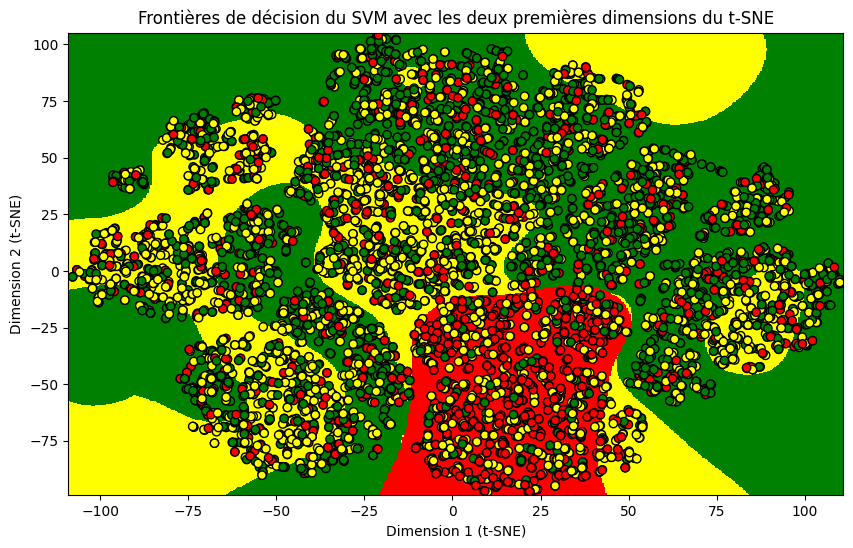

In [29]:
#Importation de ListedColormap depuis matplotlib.colors, qui permet de définir des couleurs personnalisées pour les classes
from matplotlib.colors import ListedColormap


# Définition des couleurs pour chaque classes cible
color_dict = {"Faible": "green", "Modéré": "yellow", "Élevé": "red"}
mesh_cmap = ListedColormap([color_dict["Faible"], color_dict["Modéré"], color_dict["Élevé"]])

# Définition de la taille de la grille pour visualiser les frontières de décision
mesh_size = 0.4 #nous réduisons légèrement le temps d'exécution en passant de 0.1 à 0.3
x_min, x_max = tsne_df['Dimension 1'].min() - 1, tsne_df['Dimension 1'].max() + 1
y_min, y_max = tsne_df['Dimension 2'].min() - 1, tsne_df['Dimension 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size), np.arange(y_min, y_max, mesh_size))


# Prédictions pour chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_svm.predict(grid_points)

# Convertir les labels de classe en valeurs numériques pour correspondre aux couleurs du graphique
label_mapping = {'Faible': 0, 'Modéré': 1, 'Élevé': 2}
Z_numeric = np.vectorize(label_mapping.get)(Z)
Z_numeric = Z_numeric.reshape(xx.shape)

# Création du graphique avec les frontières de décision et les points
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z_numeric, cmap=mesh_cmap, shading='auto')

# Utilisation de `color_vec` pour colorier les points correctement
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=color_vec, edgecolor='k')

# Ajout des labels et du titre
plt.xlabel("Dimension 1 (t-SNE)")
plt.ylabel("Dimension 2 (t-SNE)")
plt.title("Frontières de décision du SVM avec les deux premières dimensions du t-SNE")
plt.show()


Les frontières de décision créées à partir de notre meilleur modèle montrent différentes zones réparties en trois couleurs: la zone jaune, la zone verte, et la zone rouge. Chacune de ces zones représente une classe cible de la variable "Anxiety_score" ("Faible" pour la couleur verte, "Modéré" pour la couleur jaune, et "Élevé" pour la couleur rouge en fonction des couleurs respectives).
On observe des poches où les points d'une même couleur sont bien concentrés et correspondent à la couleur de la zone (par exemple la partie rouge), ce qui signifie que le modèle parvient à identifier ces groupes avec une précision raisonnable. Cependant, dans d'autres régions, les points de couleurs différentes se trouvent dans une même zone de décision (la couleur majoritaire des point est difficile à cerner), ce qui reflète les erreurs de classification ou les difficultés du modèle à bien séparer les classes dans l'espace représenté par les deux premières dimensions du t-SNE.

Pour aller plus loin (en plus de la consigne) et pour montrer le processus itératif que j'ai effectué pour sélectionner mon meilleur modèle, il est intéressant de refaire la même démarche (méthode mixte) mais cette fois-ci avec le modèle de notre baseline  (régression logistique multinomiale) en optimisant les paramètres pour vous montrer qu'en plus des métriques (rappel, précision, accuracy et f1_score) présentées ci-dessous, les frontières de décision créées par notre baseline sont moins bonnes que notre meilleur modèle (SVM, kernel "RBF"). Ceci a été un argument supplémentaire pour choisir comme meilleur modèle le SVM, kernel "RBF" avec comme inputs les deux premières dimensions du t-SNE.  




In [30]:
# Définition des hyperparamètres pour la recherche sur grille
params = np.linspace(0.001, 1, 30)
param_dict = {
    'C': params,
}
k = 5


In [31]:
# Séparation du jeu de données en entraînement/validation et test
coords_train_val, coords_test, labels_train_val, labels_test = train_test_split(
    tsne_df[['Dimension 1', 'Dimension 2']], outputs_combined, test_size=0.2, stratify=labels, random_state=42
)

In [32]:
# Initialisation du modèle de régression logistique multinomiale
logistic_reg = LogisticRegression(max_iter=10000, multi_class="multinomial", solver="lbfgs")

# Recherche sur grille avec validation croisée
grid_search = GridSearchCV(logistic_reg, param_dict, cv=k, scoring=['accuracy', 'precision_weighted', 'recall_weighted'],
                           verbose=1, n_jobs=-1, refit='accuracy')
grid_search.fit(coords_train_val, labels_train_val)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Utilisation du modèle avec les meilleurs hyperparamètres
best_logistic_reg = grid_search.best_estimator_

# Prédictions sur les ensembles d'entraînement/validation et de test
train_val_pred = best_logistic_reg.predict(coords_train_val)
test_pred = best_logistic_reg.predict(coords_test)

# Calcul des métriques pour l'ensemble d'entraînement/validation
train_val_accuracy = accuracy_score(labels_train_val, train_val_pred)
train_val_precision = precision_score(labels_train_val, train_val_pred, average="weighted")
train_val_recall = recall_score(labels_train_val, train_val_pred, average="weighted")
train_val_f1 = f1_score(labels_train_val, train_val_pred, average="weighted")

# Calcul des métriques pour l'ensemble de test
test_accuracy = accuracy_score(labels_test, test_pred)
test_precision = precision_score(labels_test, test_pred, average="weighted")
test_recall = recall_score(labels_test, test_pred, average="weighted")
test_f1 = f1_score(labels_test, test_pred, average="weighted")

# Affichage des résultats
print("\n=== Résultats de la régression logistique multinomiale avec dimensions 1 et 2 du t-SNE ===")
print(f"Exactitude (train/val) : {train_val_accuracy:.4f}, (test) : {test_accuracy:.4f}")
print(f"Précision (train/val) : {train_val_precision:.4f}, (test) : {test_precision:.4f}")
print(f"Rappel (train/val) : {train_val_recall:.4f}, (test) : {test_recall:.4f}")
print(f"Mesure F1 (train/val) : {train_val_f1:.4f}, (test) : {test_f1:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs hyperparamètres :  {'C': 0.035448275862068966}

=== Résultats de la régression logistique multinomiale avec dimensions 1 et 2 du t-SNE ===
Exactitude (train/val) : 0.4020, (test) : 0.4057
Précision (train/val) : 0.3944, (test) : 0.5600
Rappel (train/val) : 0.4020, (test) : 0.4057
Mesure F1 (train/val) : 0.3373, (test) : 0.3456


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


En comparaison avec notre meilleur modèle (SVM avec Kernel "RBF"), nous voyons que seule la précision sur les données de test (0.5600) est meilleure pour ce modèle (contre 0.4331 pour notre meilleur modèle). En outre, toutes les autres métriques, pour les données d'entrainement/validation et test, sont meilleures pour notre meilleur modèle ("SVM", kernel "RBF", avec dimensions 1 et 2 du t-SNE).

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


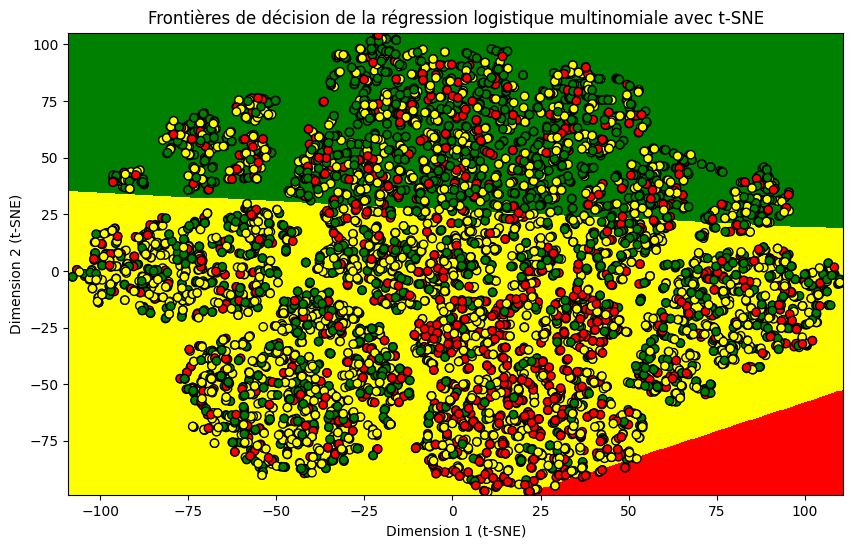

In [33]:
from matplotlib.colors import ListedColormap

# Définition des couleurs pour chaque classes cible
color_dict = {"Faible": "green", "Modéré": "yellow", "Élevé": "red"}
mesh_cmap = ListedColormap([color_dict["Faible"], color_dict["Modéré"], color_dict["Élevé"]])

# Définition de la taille de la grille pour visualiser les frontières de décision
mesh_size = 0.4
x_min, x_max = tsne_df['Dimension 1'].min() - 1, tsne_df['Dimension 1'].max() + 1
y_min, y_max = tsne_df['Dimension 2'].min() - 1, tsne_df['Dimension 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size), np.arange(y_min, y_max, mesh_size))

# Prédictions pour chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_logistic_reg.predict(grid_points)

# Convertir les labels de classe en valeurs numériques pour correspondre aux couleurs du graphique
label_mapping = {'Faible': 0, 'Modéré': 1, 'Élevé': 2}
Z_numeric = np.vectorize(label_mapping.get)(Z)
Z_numeric = Z_numeric.reshape(xx.shape)

# Création du graphique avec les frontières de décision et les points
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z_numeric, cmap=mesh_cmap, shading='auto')

# Utilisation de `color_vec` pour colorier les points correctement
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=color_vec, edgecolor='k')

# Ajout des labels et du titre
plt.xlabel("Dimension 1 (t-SNE)")
plt.ylabel("Dimension 2 (t-SNE)")
plt.title("Frontières de décision de la régression logistique multinomiale avec t-SNE")
plt.show()





Nous voyons que les frontières de décision dans le graph de la régression logistique multinomiale, sont plus linéaires et rectilignes que pour le modèle SVM avec le kernel "RBF". En outre, les frontières de décision sont plus rigides, divisant l'espace en larges bandes qui ne suivent pas nécessairement la densité ou la distribution des points dans l'espace t-SNE, comme nous pouvons l'observer sur la classe rouge (="Elevé").

Ainsi, le modèle SVM avec kernel "RBF" offre des frontières de décision plus flexibles et adaptées aux données du t-SNE, ce qui en fait un choix plus performant pour classifier les classes cibles de "Anxiety_score".

Sauvegardons maintenant notre meilleur modèle :

##4.5

In [34]:
# Importation du module pickle pour sauvegarder et charger des objets Python
import pickle

# Spécifiez le chemin pour sauvegarder le modèle
model_path = "best_svm_model.sav"

# Sauvegarde du modèle SVM avec kernel "RBF" et les meilleurs hyperparamètres
with open(model_path, "wb") as model_file_out:
    pickle.dump(best_svm, model_file_out)

print(f"Le modèle SVM a été sauvegardé sous le nom de fichier : {model_path}")

# Pour charger le modèle sauvegardé
with open(model_path, "rb") as model_file_in:
    best_model_loaded = pickle.load(model_file_in)

# Afficher le modèle chargé pour vérification
print(best_model_loaded)


Le modèle SVM a été sauvegardé sous le nom de fichier : best_svm_model.sav
SVC(C=8.0, gamma=0.001, max_iter=10000)
